# Notebook to visualize TCAV sports results 

Loads TCAV results .pkl files, where concepts are defined. 

Use function to visualize and save histograms of TCAV score distribution and bar plots of overview of testing

### Followed by visual of sensitivity scores

In [1]:
import sys 
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results, plot_results_mark

In [43]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'positive'
results = '_sport'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

got that data


In [44]:
folders = ['Acrobatic sports','Air sports','Aquatic and paddle sports',
 'Archery','Athletics','Bat and ball games','Board game','Boardsport','Card game','Catching games','Climbing',
 'Combat sports','Cycling','Dog sports','Electronic sports','Equestrian sports','Esports','Fishing','Flying disc sports',
 'Gymnastics','Hunting','Ice sports','Invasion games','Kite sports','Marker sports','Mixed discipline','Motersport',
 'Net and wall games','Orienteering family','Other','Other mind sports','Overlapping sports','Parkour Freerunning',
 'Remote control','Rodeo','Running','Sailing','Shooting sports','Skating sports','Snow sports','Speedcubing',
 'Stacking','Street sports','Strength sports','Table sports','Tag game','Target sport','Walking','Weightlifting']

concepts = list(map(lambda x: x.lower(), folders))
concepts = [x.replace(' ','_') for x in concepts]

/zhome/94/5/127021/speciale/master_project/src/visualization/figures/
concept acrobatic_sports
concept air_sports
concept aquatic_and_paddle_sports
concept archery
concept athletics
concept bat_and_ball_games
concept board_game
concept boardsport
concept card_game
concept catching_games
concept climbing
concept combat_sports
concept cycling
concept dog_sports
concept electronic_sports
concept equestrian_sports
concept esports
concept fishing
concept flying_disc_sports
concept gymnastics
concept hunting
concept ice_sports
concept invasion_games
concept kite_sports
concept marker_sports
concept mixed_discipline
concept motersport
concept net_and_wall_games
concept orienteering_family
concept other
concept other_mind_sports
concept overlapping_sports
concept parkour_freerunning
concept remote_control
concept rodeo
concept running
concept sailing
concept shooting_sports
concept skating_sports
concept snow_sports
concept speedcubing
concept stacking
concept street_sports
concept strength_sp

/zhome/94/5/127021/speciale/master_project/src/visualization/tcav_visual.py:304: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


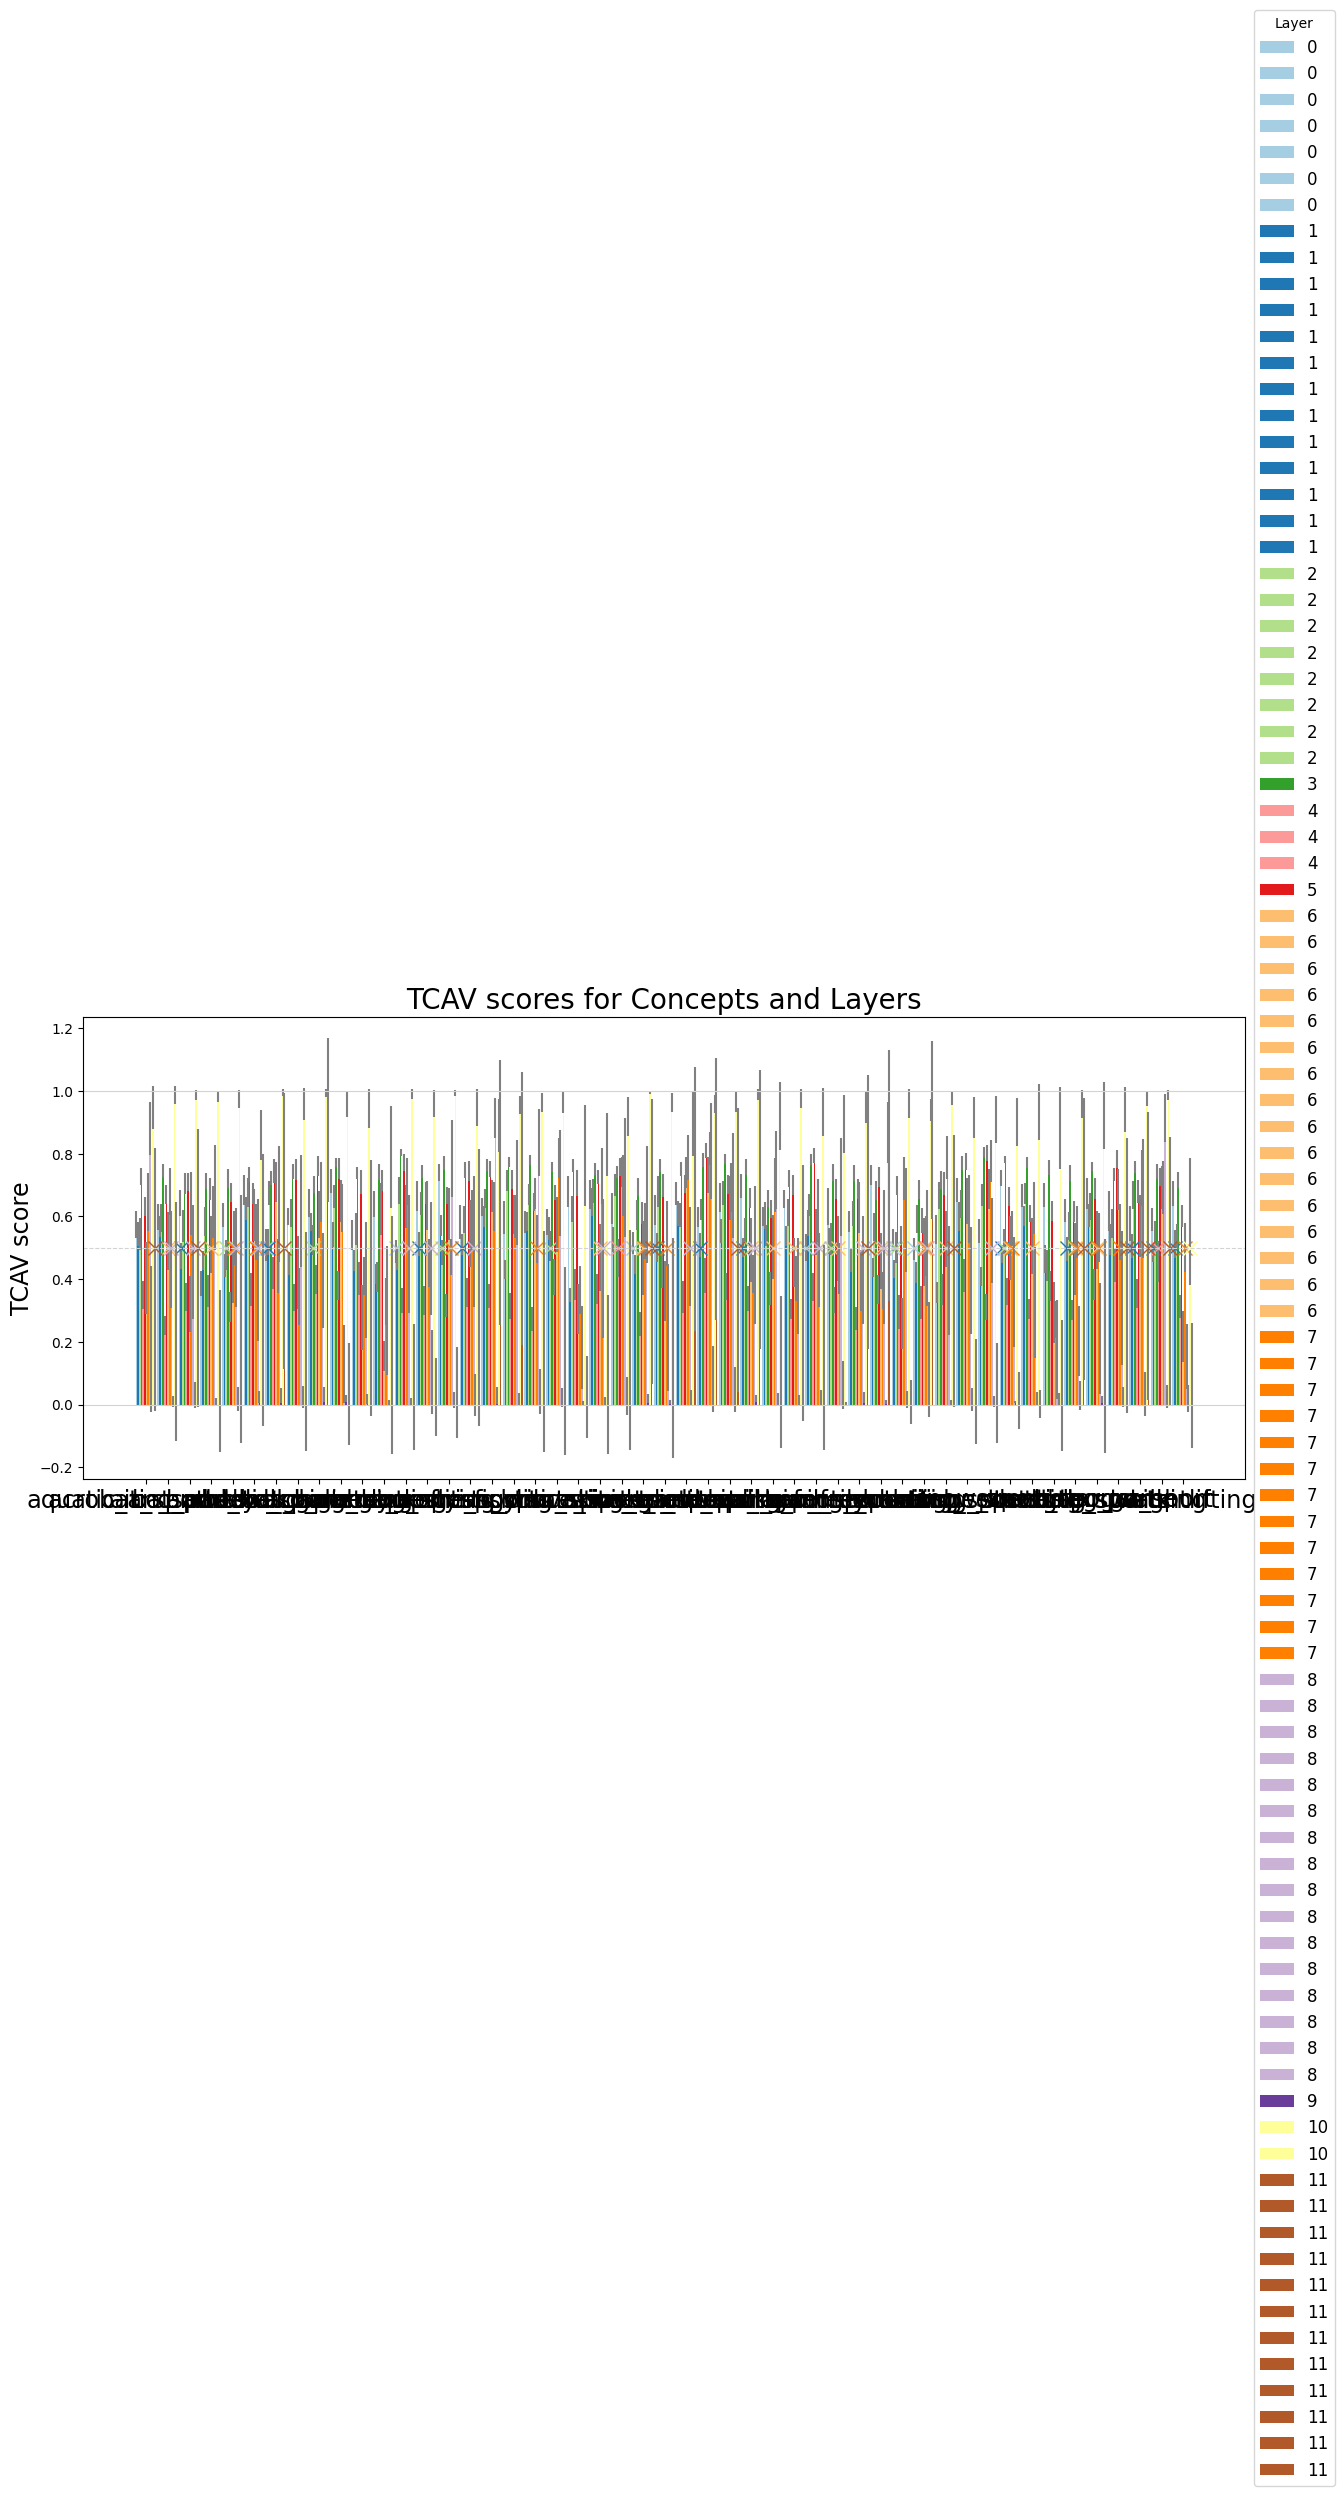

In [45]:
PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
SAVE = False
BON_NR = 12*(len(folders))
output = plot_results_mark(data, target, concepts ,PATH, plot_hist = False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR)

In [46]:
layers = ['roberta.encoder.layer.0.output.dropout',
             'roberta.encoder.layer.1.output.dropout',
             'roberta.encoder.layer.2.output.dropout',
             'roberta.encoder.layer.3.output.dropout',
             'roberta.encoder.layer.4.output.dropout',
             'roberta.encoder.layer.5.output.dropout',
             'roberta.encoder.layer.6.output.dropout',
             'roberta.encoder.layer.7.output.dropout',
             'roberta.encoder.layer.8.output.dropout',
             'roberta.encoder.layer.9.output.dropout',
             'roberta.encoder.layer.10.output.dropout',
             'roberta.encoder.layer.11.output.dropout'
            ]

In [47]:
layer_nr = [0,1,2,3,4,5,6,7,8,9,10,11] * len(concepts)
df = pd.DataFrame(layer_nr,columns=['layers'])
df['concepts'] = 'none'
df['mean'] = 100
df['std'] = 100
df['p-value'] = 100
df['significant'] = 'none'

In [48]:

for i, fold in enumerate(folders):
    # concept
    df.iloc[(i*12):((i*12)+12),1] = fold
    # mean
    df.iloc[ i*12, 2] = output[layers[0]]['bn_vals'][i]
    df.iloc[ (i*12)+1,2] = output[layers[1]]['bn_vals'][i]
    df.iloc[ (i*12)+2,2] = output[layers[2]]['bn_vals'][i]
    df.iloc[ (i*12)+3,2] = output[layers[3]]['bn_vals'][i]
    df.iloc[ (i*12)+4,2] = output[layers[4]]['bn_vals'][i]
    df.iloc[ (i*12)+5,2] = output[layers[5]]['bn_vals'][i]
    df.iloc[ (i*12)+6,2] = output[layers[6]]['bn_vals'][i]
    df.iloc[ (i*12)+7,2] = output[layers[7]]['bn_vals'][i]
    df.iloc[ (i*12)+8,2] = output[layers[8]]['bn_vals'][i]
    df.iloc[ (i*12)+9,2] = output[layers[9]]['bn_vals'][i]
    df.iloc[ (i*12)+10,2] = output[layers[10]]['bn_vals'][i]
    df.iloc[ (i*12)+11,2] = output[layers[11]]['bn_vals'][i]
    # std
    df.iloc[ i*12,3] = output[layers[0]]['bn_stds'][i]
    df.iloc[ (i*12)+1,3] = output[layers[1]]['bn_stds'][i]
    df.iloc[ (i*12)+2,3] = output[layers[2]]['bn_stds'][i]
    df.iloc[ (i*12)+3,3] = output[layers[3]]['bn_stds'][i]
    df.iloc[ (i*12)+4,3] = output[layers[4]]['bn_stds'][i]
    df.iloc[ (i*12)+5,3] = output[layers[5]]['bn_stds'][i]
    df.iloc[ (i*12)+6,3] = output[layers[6]]['bn_stds'][i]
    df.iloc[ (i*12)+7,3] = output[layers[7]]['bn_stds'][i]
    df.iloc[ (i*12)+8,3] = output[layers[8]]['bn_stds'][i]
    df.iloc[ (i*12)+9,3] = output[layers[9]]['bn_stds'][i]
    df.iloc[ (i*12)+10,3] = output[layers[10]]['bn_stds'][i]
    df.iloc[ (i*12)+11,3] = output[layers[11]]['bn_stds'][i]
    # p- value
    df.iloc[ i*12,4] = output[layers[0]]['p-value'][i]
    df.iloc[ (i*12)+1,4] = output[layers[1]]['p-value'][i]
    df.iloc[ (i*12)+2,4] = output[layers[2]]['p-value'][i]
    df.iloc[ (i*12)+3,4] = output[layers[3]]['p-value'][i]
    df.iloc[ (i*12)+4,4] = output[layers[4]]['p-value'][i]
    df.iloc[ (i*12)+5,4] = output[layers[5]]['p-value'][i]
    df.iloc[ (i*12)+6,4] = output[layers[6]]['p-value'][i]
    df.iloc[ (i*12)+7,4] = output[layers[7]]['p-value'][i]
    df.iloc[ (i*12)+8,4] = output[layers[8]]['p-value'][i]
    df.iloc[ (i*12)+9,4] = output[layers[9]]['p-value'][i]
    df.iloc[ (i*12)+10,4] = output[layers[10]]['p-value'][i]
    df.iloc[ (i*12)+11,4] = output[layers[11]]['p-value'][i]
    # significant 
    df.iloc[ i*12,5] = output[layers[0]]['significant'][i]
    df.iloc[ (i*12)+1,5] = output[layers[1]]['significant'][i]
    df.iloc[ (i*12)+2,5] = output[layers[2]]['significant'][i]
    df.iloc[ (i*12)+3,5] = output[layers[3]]['significant'][i]
    df.iloc[ (i*12)+4,5] = output[layers[4]]['significant'][i]
    df.iloc[ (i*12)+5,5] = output[layers[5]]['significant'][i]
    df.iloc[ (i*12)+6,5] = output[layers[6]]['significant'][i]
    df.iloc[ (i*12)+7,5] = output[layers[7]]['significant'][i]
    df.iloc[ (i*12)+8,5] = output[layers[8]]['significant'][i]
    df.iloc[ (i*12)+9,5] = output[layers[9]]['significant'][i]
    df.iloc[ (i*12)+10,5] = output[layers[10]]['significant'][i]
    df.iloc[ (i*12)+11,5] = output[layers[11]]['significant'][i]

In [49]:
with open('/zhome/94/5/127021/speciale/master_project/src/visualization/table/sport_pos_tcav.tex', 'w') as tf:
    tf.write(df.to_latex(index=False))

/tmp/ipykernel_15719/2459158224.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df.to_latex(index=False))


In [50]:
import os
os.getcwd()

'/zhome/94/5/127021/speciale/master_project/notebooks'

In [51]:
df = pd.DataFrame(mat, columns = col2)

with open('/zhome/94/5/127021/speciale/master_project/src/visualization/table/gender_neg_tcav.tex', 'w') as tf:
    tf.write(df.to_latex())

/tmp/ipykernel_1288/2172565373.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df.to_latex())
